In [1]:
import PyLRO as pyl

In [2]:
mg = pyl.pylro(filename='CONTCAR', atom_number=12)
mg.lattice_fit()
#mg.miller_sphere_plot()

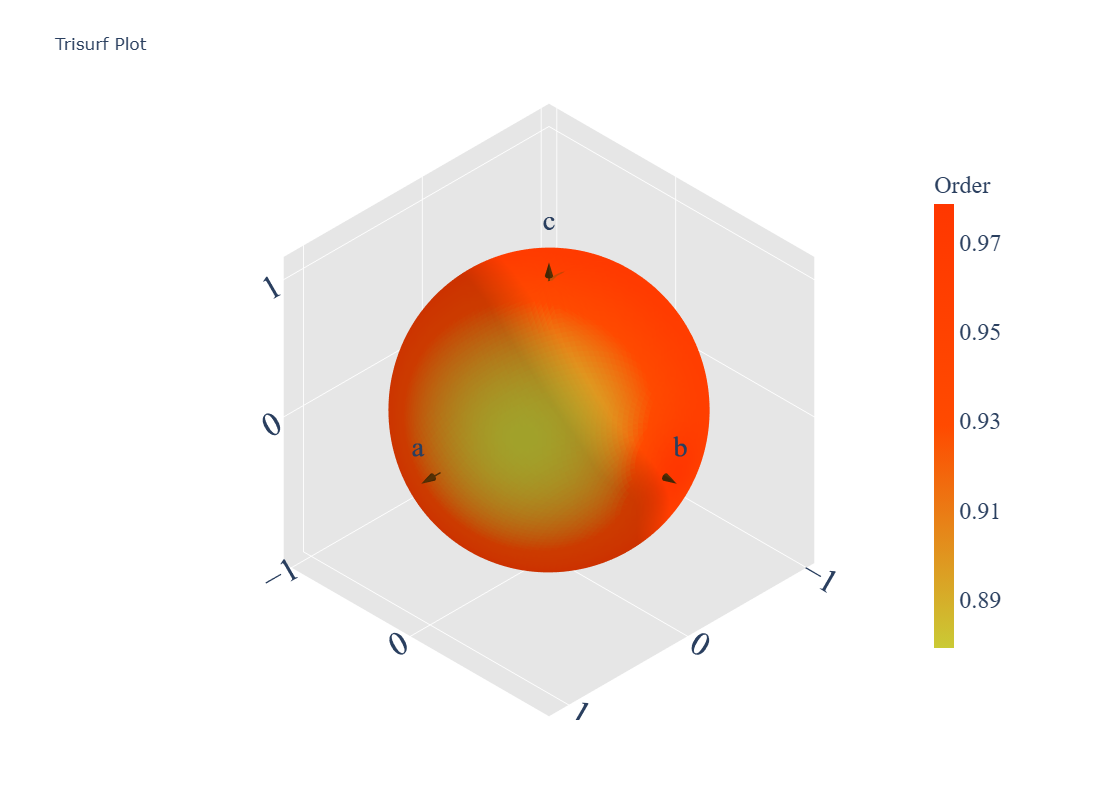

In [3]:
mg.miller_sphere_plot()

In [4]:
# Assuming 'li' is an instance of your class that contains the 'maximum_order' method
max_order, max_hkl = mg.maximum_order()

# Output the results
print(f"Maximum Order: {max_order}")
print(f"Corresponding Miller Index (hkl): {max_hkl}")

Maximum Order: 0.02137968333933718
Corresponding Miller Index (hkl): [-0.53849683  0.03862661  0.84174173]


In [5]:
# Assuming 'li' is an instance of your class that contains the 'minimum_order' method
min_order, min_hkl = mg.minimum_order()

# Output the results
print(f"Minimum Order: {min_order}")
print(f"Corresponding Miller Index (hkl): {min_hkl}")


Minimum Order: 0.12074584187694117
Corresponding Miller Index (hkl): [0.75603999 0.50500715 0.4163788 ]


In [6]:
plane = [1, 0, 0]  # Example plane direction
result = mg.plane_order(plane, angstrom=True)
print("Average disorder in angstroms:", result)

result_relative = mg.plane_order(plane, angstrom=False)
print("Average disorder in relative units:", result_relative)

Average disorder in angstroms: 0.8017316768235201
Average disorder in relative units: 0.09100421949593074


In [7]:
plane = [0, 1, 0]  # Example plane direction
result = mg.plane_order(plane, angstrom=True)
print("Average disorder in angstroms:", result)

result_relative = mg.plane_order(plane, angstrom=False)
print("Average disorder in relative units:", result_relative)

Average disorder in angstroms: 0.670951478948807
Average disorder in relative units: 0.06231806140828621


In [8]:
plane = [0, 0, 1]  # Example plane direction
result = mg.plane_order(plane, angstrom=True)
print("Average disorder in angstroms:", result)

result_relative = mg.plane_order(plane, angstrom=False)
print("Average disorder in relative units:", result_relative)

Average disorder in angstroms: 0.5704175588650312
Average disorder in relative units: 0.04916663787182222


In [9]:
mg.dimensions

[4, 6, 2]

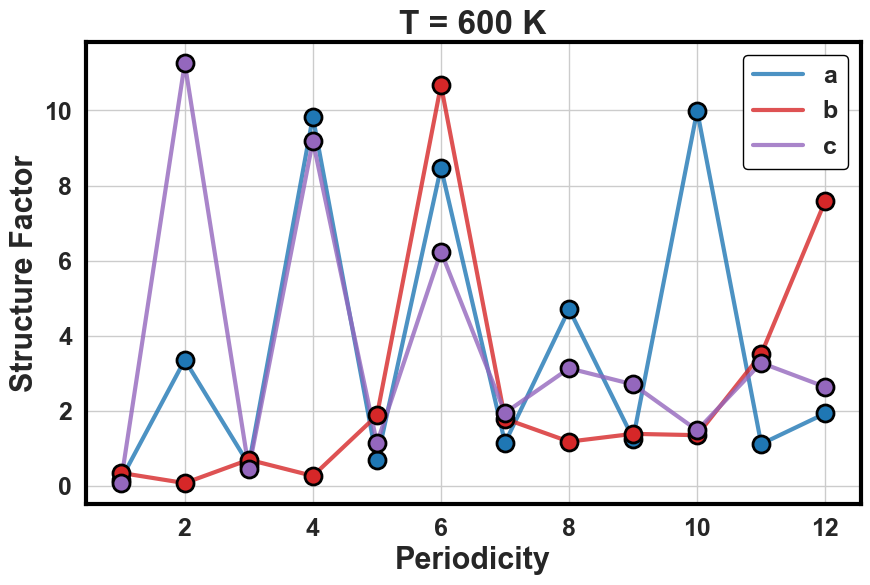

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def structure_factor(pos, hkl):
    """ N*1 array"""
    F = 0
    h, k, l = hkl
    for xyz in pos:
        x, y, z = xyz
        F += np.exp(-2 * np.pi * (1j) * (h * x + k * y + l * z))
    return F

# Set the style for the plot
sns.set(style="whitegrid")
plt.rcParams["axes.titlesize"] = 24  # Increase title font size
plt.rcParams["axes.labelsize"] = 22  # Increase axis label font size
plt.rcParams["xtick.labelsize"] = 18  # Increase x-tick label font size
plt.rcParams["ytick.labelsize"] = 18  # Increase y-tick label font size
plt.rcParams["legend.fontsize"] = 18  # Increase legend font size
plt.rcParams["legend.title_fontsize"] = 20  # Increase legend title font size
plt.rcParams["font.weight"] = 'bold'  # Set font weight to bold

pmax = 13
stest = range(1, 13)
basis = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
abc = []

# Compute structure factor for different Miller indices
for b in basis:
    s = []
    for i in stest:
        factor = np.abs(structure_factor(mg.atom_locations, b * i))
        # Only append positive structure factors
        if factor > 0:
            s.append(factor)
        else:
            s.append(np.nan)  # Use NaN to omit negative or zero values from plotting
    abc.append(s)

# Create a plot
fig = plt.figure(figsize=(10, 6))  # Adjust the size to your preference

# Define new deep colors
colors = ['#1f77b4', '#d62728', '#9467bd']  # Deep blue, deep red, deep purple
labels = ['a', 'b', 'c']

# Plot each direction with updated colors
for i in range(3):
    plt.plot(stest, abc[i], label=labels[i], color=colors[i], alpha=0.8, linewidth=3)
    plt.scatter(stest, abc[i], color=colors[i], s=150, zorder=5, edgecolor='black', linewidth=2)

# Add a black border around the plot (outside the graph area)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')  # Set the border color to black
    spine.set_linewidth(3)        # Set the border width

# Improve legend with bold square box, and deep color
plt.legend(frameon=True, loc='upper right', fontsize=18, framealpha=1, facecolor='white', edgecolor='black', markerfirst=True)

# Customize labels and title
plt.ylabel('Structure Factor', fontsize=22, fontweight='bold')
plt.xlabel('Periodicity', fontsize=22, fontweight='bold')
plt.title('T = 600 K', fontsize=24, fontweight='bold')  # Changed title

# Save the plot as a .tif file
plt.savefig('structure_factor_plot_with_border_600.tif', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [11]:
mg.dimensions

[4, 6, 2]